In [42]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [43]:
Ruta = r"c:\Users\osmarrincon\OneDrive - 891856000_CAPRESOCA E P S\Escritorio\Yesid Rincón Z\informes\2025\CTO135.2025 Informe  #7\ACTIVIDAD 14\Presatciones economicas\PRESTACIONES ECONOMICAS 2024 - 2025.xlsx"
Hoja="CONSOLIDADO 24-25 PE"

In [44]:
df = pd.read_excel(Ruta, sheet_name=Hoja, dtype=str)
df.head()

,Source.Name,Código de la EPS,Fecha del Proceso,Tipo de Prestación Económica,Tipo de Documento del cotizante,Número documento del cotizante,Serial BDUA,Tipo de Cotizante,Tipo de Documento del aportante,Número documento del aportante,...,Número de Documento de la madre cotizante fallecida,Número autorización licencia para el caso de la madre cotizante fallecida,Días faltantes de licencia madre fallecida,Aprobación de la Licencia.,Código de glosas para registros con inconsistencia,AÑO,MES NUM,MES,TIPO INCAPACIDAD,ESTADO
0,PRE4023EPSC2519042024.txt,EPSC25,2024-04-19 00:00:00,1,CC,1116041167,85215103,1,NI,900194809,...,NaN,NaN,0,1,NaN,2024,4,Abril,licencia de Maternidad - Incapcidad,VALIDADO
1,PRE4023EPSC2519042024.txt,EPSC25,2024-04-19 00:00:00,3,CC,1118123953,77926338,3,CC,1118123953,...,NaN,NaN,0,1,NaN,2024,4,Abril,licencia de Maternidad - Incapcidad,VALIDADO
2,PRE4023EPSC2519042024.txt,EPSC25,2024-04-19 00:00:00,1,CC,1006558728,71594502,3,CC,1006558728,...,NaN,NaN,0,1,NaN,2024,4,Abril,licencia de Maternidad - Incapcidad,VALIDADO
3,PRE4023EPSC2519042024.txt,EPSC25,2024-04-19 00:00:00,3,CC,1118569787,67567049,3,CC,1118569787,...,NaN,NaN,0,1,NaN,2024,7,Julio,Inicial (Hasta 90 días),VALIDADO
4,PRE4023EPSC2519042024.txt,EPSC25,2024-04-19 00:00:00,3,CC,1007436205,98300480,1,NI,901145978,...,NaN,NaN,0,1,NaN,2024,7,Julio,Inicial (Hasta 90 días),VALIDADO


In [45]:
df.columns

Index(['Source.Name', 'Código de la EPS', 'Fecha del Proceso',
       'Tipo de Prestación Económica', 'Tipo de Documento del cotizante',
       'Número documento del cotizante', 'Serial BDUA', 'Tipo de Cotizante',
       'Tipo de Documento del aportante', 'Número documento del aportante',
       'Ingreso base de cotización', 'Tipo de Salario',
       'Fecha Inicio Licencia o Incapacidad',
       'Fecha Terminación de la Licencia o incapacidad',
       'Días pagados de licencia o incapacidad',
       'Fecha de pago de licencia o incapacidad al aportante',
       'Licencia o incapacidad deducida o pagada',
       'Valor de licencia o incapacidad deducida o pagada',
       'Número autorización de licencia o incapacidad', 'Tipo de Incapacidad',
       'Tipo de licencia', 'Días de Gestación',
       'Días para nacimientos de niños prematuros', 'Fecha Gestacional',
       'Fecha de nacimiento a término',
       'Tipo de Documento de la madre cotizante fallecida',
       'Número de Documento 

# Análisis corregido de la evolución de glosas y validaciones (febrero 2024 a mayo 2025)

Se analiza la evolución de los estados "GLOSADA" y "VALIDADO" en el consolidado de incapacidades y licencias, usando las columnas "MES", "ESTADO", "Serial BDUA" y "Número documento del aportante".

**Interpretación sugerida:**  
- El primer gráfico muestra la cantidad de registros únicos glosados y validados por mes.
- El segundo gráfico permite ver si la proporción de glosas ha disminuido, aumentado o se ha mantenido estable en el periodo analizado.
- Puedes complementar el análisis revisando meses con picos o caídas y cruzando con eventos o cambios en procesos internos.

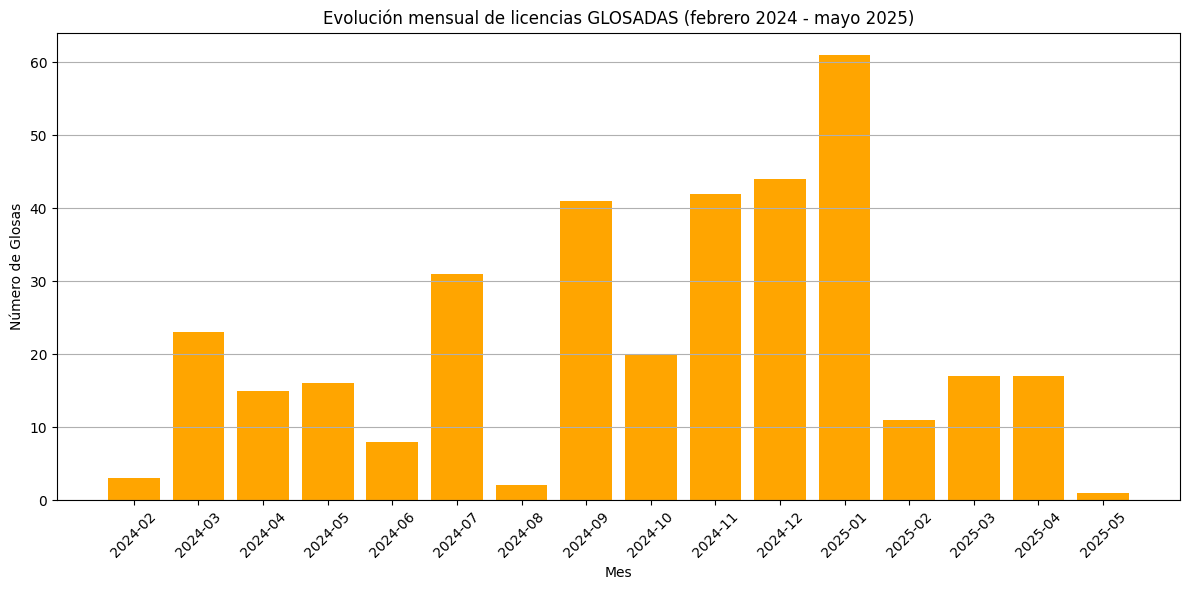

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegurarse de que la columna 'Fecha del Proceso' esté en formato datetime
df['Fecha del Proceso'] = pd.to_datetime(df['Fecha del Proceso'], errors='coerce')

# Filtrar por el periodo febrero 2024 a mayo 2025
inicio = '2024-02-01'
fin = '2025-05-31'
df_periodo = df[(df['Fecha del Proceso'] >= inicio) & (df['Fecha del Proceso'] <= fin)]

# Filtrar los registros con estado "GLOSADA"
df_glosadas = df_periodo[df_periodo['ESTADO'] == 'GLOSADA']

# Agrupar por año y mes para contar la cantidad de glosas
glosas_mensuales = df_glosadas.groupby(['AÑO', 'MES NUM']).size().reset_index(name='Total Glosas')

# Ordenar por año y mes para asegurar la secuencia cronológica
glosas_mensuales = glosas_mensuales.sort_values(by=['AÑO', 'MES NUM'])

# Crear una columna de fecha combinada para graficar
glosas_mensuales['Fecha'] = pd.to_datetime(glosas_mensuales['AÑO'].astype(str) + '-' + glosas_mensuales['MES NUM'].astype(str).str.zfill(2) + '-01')

# Asegurarnos de que los datos estén ordenados por fecha
glosas_mensuales = glosas_mensuales.sort_values('Fecha')

# Volver a graficar con las fechas ordenadas
plt.figure(figsize=(12, 6))
plt.bar(glosas_mensuales['Fecha'].dt.strftime('%Y-%m'), glosas_mensuales['Total Glosas'], color='orange')
plt.title('Evolución mensual de licencias GLOSADAS (febrero 2024 - mayo 2025)')
plt.xlabel('Mes')
plt.ylabel('Número de Glosas')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



<Figure size 1400x600 with 0 Axes>

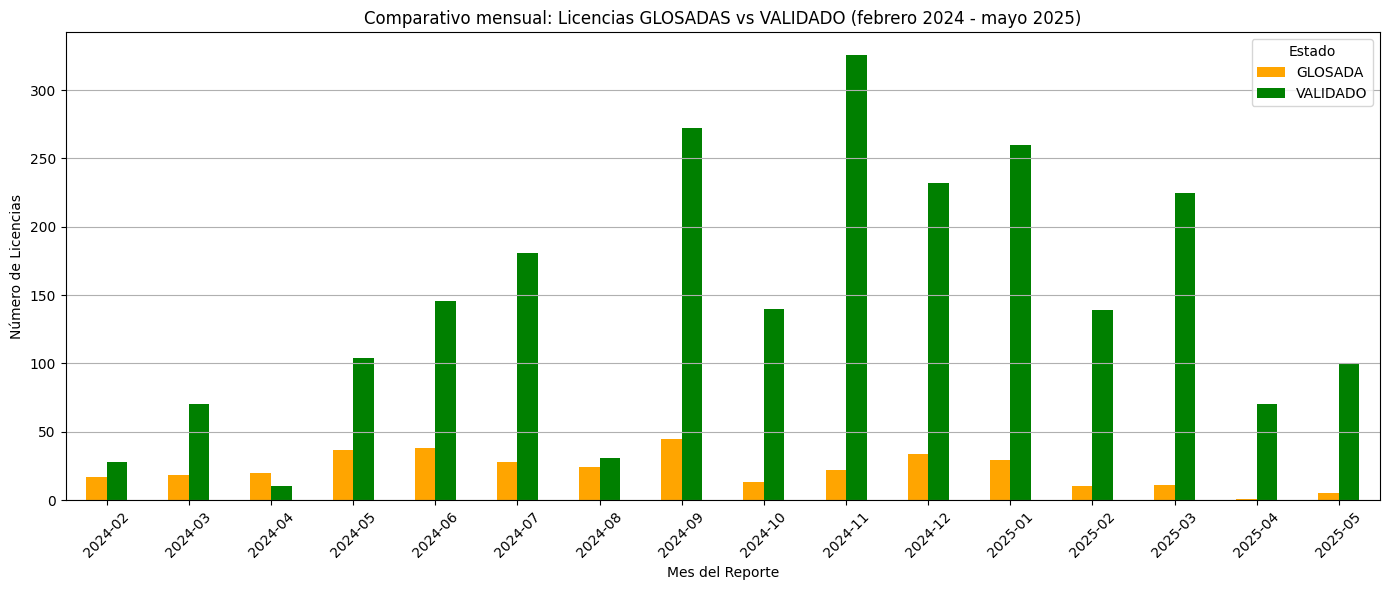

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar por el periodo de interés
inicio = '2024-02-01'
fin = '2025-05-31'
df['Fecha del Proceso'] = pd.to_datetime(df['Fecha del Proceso'], errors='coerce')
df_periodo = df[(df['Fecha del Proceso'] >= inicio) & (df['Fecha del Proceso'] <= fin)]

# Crear columna de fecha mensual (inicio del mes)
df_periodo['MesReporte'] = df_periodo['Fecha del Proceso'].dt.to_period('M').dt.to_timestamp()

# Agrupar por mes y estado (GLOSADA o VALIDADO)
conteo_estados = df_periodo.groupby(['MesReporte', 'ESTADO']).size().unstack(fill_value=0)

# Ordenar por fecha
conteo_estados = conteo_estados.sort_index()

# Replot con fechas más limpias (solo año y mes)
plt.figure(figsize=(14, 6))
conteo_estados.index = conteo_estados.index.to_series().dt.strftime('%Y-%m')  # <- clave
conteo_estados.plot(kind='bar', stacked=False, color=['orange', 'green'], figsize=(14, 6))

plt.title('Comparativo mensual: Licencias GLOSADAS vs VALIDADO (febrero 2024 - mayo 2025)')
plt.xlabel('Mes del Reporte')
plt.ylabel('Número de Licencias')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.legend(title='Estado')
plt.show()


# 🔎 1. Tasa de glosas mensual (%)

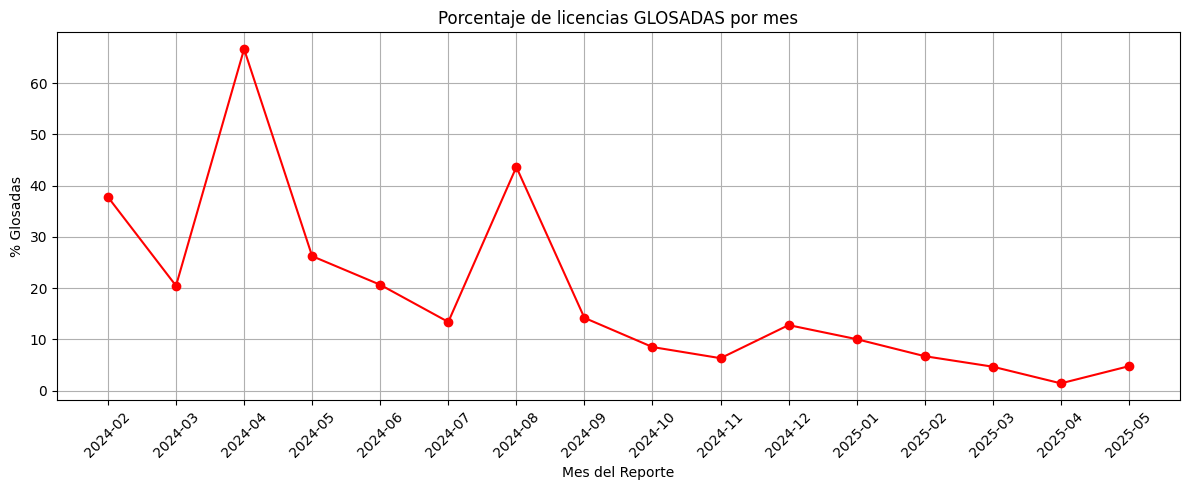

In [48]:
# Calcular la tasa de glosas mensual
tasa_glosas = conteo_estados.copy()
tasa_glosas['Total'] = tasa_glosas.sum(axis=1)
tasa_glosas['% Glosadas'] = (tasa_glosas['GLOSADA'] / tasa_glosas['Total']) * 100

# Gráfico de línea de la tasa de glosas
plt.figure(figsize=(12, 5))
plt.plot(tasa_glosas.index, tasa_glosas['% Glosadas'], marker='o', color='red')
plt.title('Porcentaje de licencias GLOSADAS por mes')
plt.xlabel('Mes del Reporte')
plt.ylabel('% Glosadas')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 📌 2. Top 10 documentos de aportante más glosados

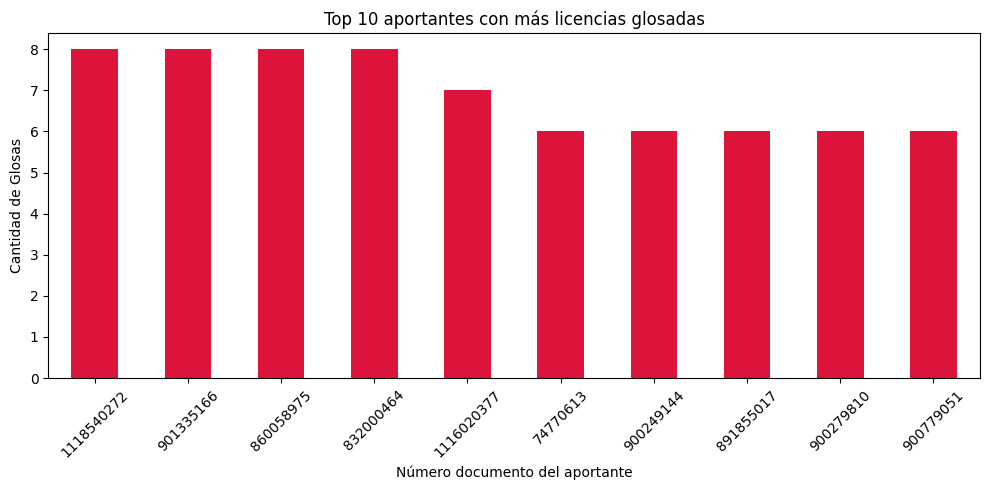

In [49]:
top_aportantes = df[df['ESTADO'] == 'GLOSADA'] \
    .groupby('Número documento del aportante').size() \
    .sort_values(ascending=False).head(10)

top_aportantes.plot(kind='bar', color='crimson', figsize=(10, 5))
plt.title('Top 10 aportantes con más licencias glosadas')
plt.ylabel('Cantidad de Glosas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 👤 3. Top 10 cotizantes con más glosas

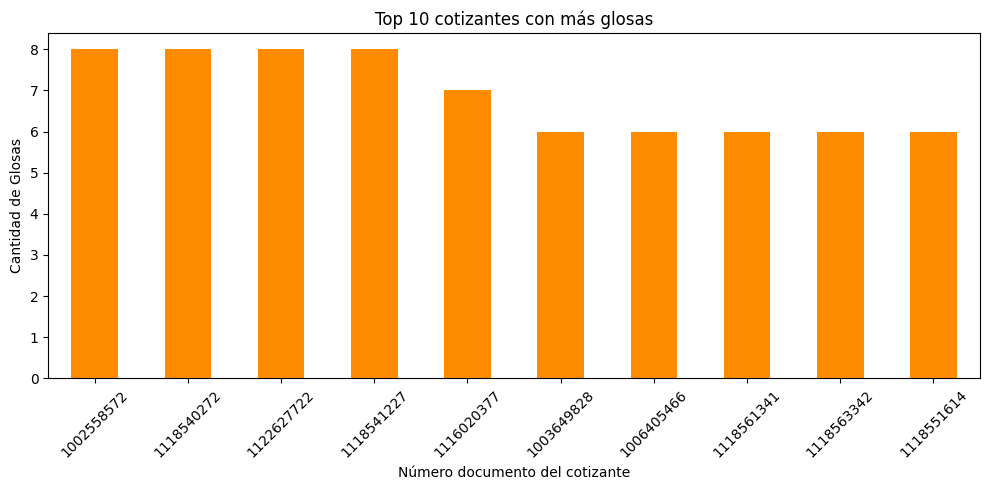

In [50]:
top_cotizantes = df[df['ESTADO'] == 'GLOSADA'] \
    .groupby('Número documento del cotizante').size() \
    .sort_values(ascending=False).head(10)

top_cotizantes.plot(kind='bar', color='darkorange', figsize=(10, 5))
plt.title('Top 10 cotizantes con más glosas')
plt.ylabel('Cantidad de Glosas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# ⚠️ 4. Distribución de códigos de glosa

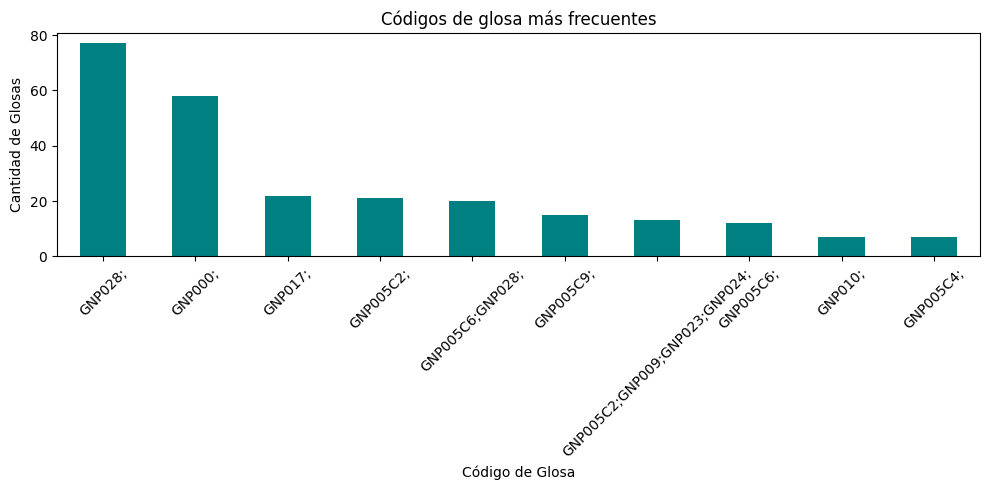

In [51]:
cod_glosa = df[df['ESTADO'] == 'GLOSADA']['Código de glosas para registros con inconsistencia']
top_glosas = cod_glosa.value_counts().head(10)

top_glosas.plot(kind='bar', color='teal', figsize=(10, 5))
plt.title('Códigos de glosa más frecuentes')
plt.ylabel('Cantidad de Glosas')
plt.xlabel('Código de Glosa')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 📆 5. Duración de las licencias glosadas vs validadas

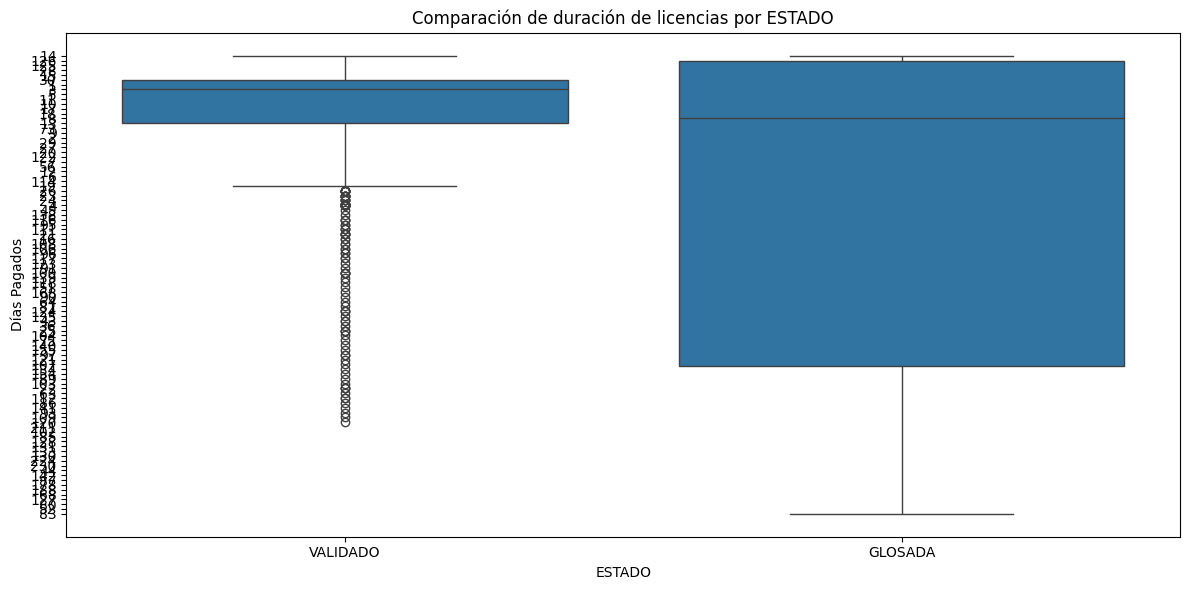

In [52]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df['ESTADO'].isin(['GLOSADA', 'VALIDADO'])],
            x='ESTADO', y='Días pagados de licencia o incapacidad')
plt.title('Comparación de duración de licencias por ESTADO')
plt.ylabel('Días Pagados')
plt.tight_layout()
plt.show()